## Catalogue Demo

This is a run-through of the MBII galaxy catalogues along with a few basic sanity checks

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

central_name='spatial_central'

In [2]:
# Read in the catalogues 
base = '../catalogues/fiducial/'
fid = fi.FITS(base+'mbii-ndm1000-nst300-snapshot85.fits')[-1].read()
sym = fi.FITS(base+'mbii-ndm1000-nst300-snapshot85-symmetrised.fits')[-1].read()

In [3]:
# First let's print out some basic statistics

print('Total number of galaxies:', fid.size)
print('Number is preserved by symmetrisation?:', fid.size==sym.size)

ids = np.unique(fid['halo_id'])
ncent = [len(fid[(fid[central_name]==1) & (fid['halo_id']==hi) ]) for hi in ids]
ncent = np.array(ncent)
print('Maximum no. of centrals per halo :', ncent.max())
print('Minimum no. of centrals per halo :', ncent.min())
print('Global satellite fraction : %d/%d (%3.3f percent)'%(fid[(fid[central_name]!=1)].size, fid.size, 100*(1 - fid[(fid[central_name]==1)].size*1.0/fid.size)  ))

Total number of galaxies: 113560
Number is preserved by symmetrisation?: True
Maximum no. of centrals per halo : 1
Minimum no. of centrals per halo : 0
Global satellite fraction : 37383/113560 (32.919 percent)


In [4]:
cmask = (fid[central_name]==1)
print('All subhalos')
print('Mean e1 : %3.4f +- %3.4f'%(fid['e1'].mean(), fid['e1'].std()/np.sqrt(fid['e1'].size) ))
print('Mean e2 : %3.4f +- %3.4f'%(fid['e2'].mean(), fid['e2'].std()/np.sqrt(fid['e2'].size) ))

print('Mean e1 (symmetrised) : %3.4f +- %3.4f'%(sym['e1'].mean(), sym['e1'].std()/np.sqrt(sym['e1'].size) ))
print('Mean e2 (symmetrised) : %3.4f +- %3.4f'%(sym['e2'].mean(), sym['e2'].std()/np.sqrt(sym['e2'].size) ))

print('')
print('Satellites')
print('Mean e1 : %3.4f +- %3.4f'%(fid['e1'][np.invert(cmask)].mean(), fid['e1'][np.invert(cmask)].std()/np.sqrt(fid['e1'][np.invert(cmask)].size) ))
print('Mean e2 : %3.4f +- %3.4f'%(fid['e2'][np.invert(cmask)].mean(), fid['e2'][np.invert(cmask)].std()/np.sqrt(fid['e2'][np.invert(cmask)].size) ))

print('Mean e1 (symmetrised) : %3.4f +- %3.4f'%(sym['e1'][np.invert(cmask)].mean(), sym['e1'][np.invert(cmask)].std()/np.sqrt(sym['e1'][np.invert(cmask)].size) ))
print('Mean e2 (symmetrised) : %3.4f +- %3.4f'%(sym['e2'][np.invert(cmask)].mean(), sym['e2'][np.invert(cmask)].std()/np.sqrt(sym['e2'][np.invert(cmask)].size) ) )

print('')
print('Centrals')
print('Mean e1 : %3.4f +- %3.4f'%(fid['e1'][cmask].mean(), fid['e1'][cmask].std()/np.sqrt(fid[cmask]['e1'].size) ))
print('Mean e2 : %3.4f +- %3.4f'%(fid['e2'][cmask].mean(), fid['e2'][cmask].std()/np.sqrt(fid[cmask]['e2'].size) ))

print('Mean e1 (symmetrised) : %3.4f +- %3.4f'%(sym['e1'][cmask].mean(), sym['e1'][cmask].std()/np.sqrt(sym['e1'][cmask].size) ))
print('Mean e2 (symmetrised) : %3.4f +- %3.4f'%(sym['e2'][cmask].mean(), sym['e2'][cmask].std()/np.sqrt(sym['e2'][cmask].size) ))

All subhalos
Mean e1 : -0.0001 +- 0.0004
Mean e2 : -0.0000 +- 0.0004
Mean e1 (symmetrised) : 0.0006 +- 0.0004
Mean e2 (symmetrised) : 0.0002 +- 0.0004

Satellites
Mean e1 : -0.0012 +- 0.0007
Mean e2 : -0.0010 +- 0.0007
Mean e1 (symmetrised) : 0.0008 +- 0.0007
Mean e2 (symmetrised) : -0.0003 +- 0.0007

Centrals
Mean e1 : 0.0005 +- 0.0005
Mean e2 : 0.0004 +- 0.0005
Mean e1 (symmetrised) : 0.0005 +- 0.0005
Mean e2 (symmetrised) : 0.0004 +- 0.0005


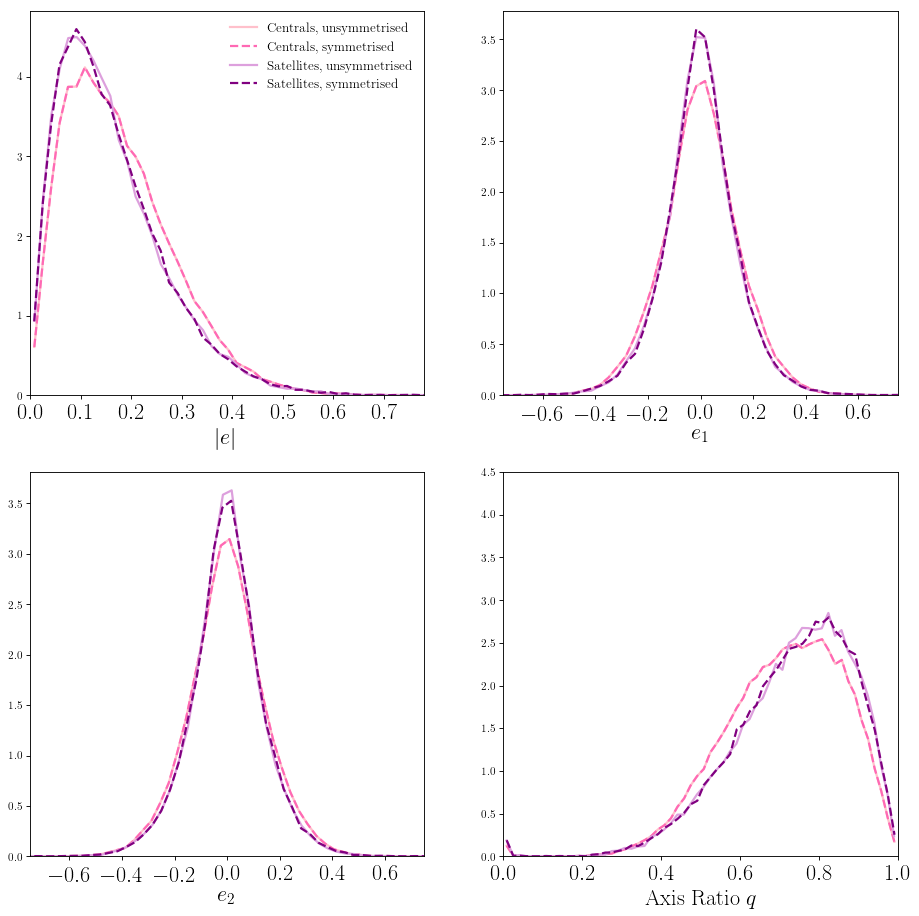

In [5]:
cmask = (fid[central_name]==1)


fig=plt.figure(figsize=(14, 14), dpi= 80, facecolor='w', edgecolor='k')

# Plot the ellipticity distributions
Hc,cbins = np.histogram(np.sqrt(fid['e1'][cmask]**2+fid['e2'][cmask]**2), bins=60, normed=1)
Hc_sym, cbins_sym = np.histogram(np.sqrt(sym['e1'][cmask]**2+sym['e2'][cmask]**2), bins=60, normed=1)
Hs, sbins = np.histogram(np.sqrt(fid['e1'][np.invert(cmask)]**2+fid['e2'][np.invert(cmask)]**2), bins=60, normed=1)
Hs_sym, sbins_sym = np.histogram(np.sqrt(sym['e1'][np.invert(cmask)]**2+sym['e2'][np.invert(cmask)]**2), bins=60, normed=1)

x = (cbins[:-1]+cbins[1:])/2
ax = plt.subplot(221)
plt.plot((cbins[:-1]+cbins[1:])/2, Hc, color='pink', lw=2, label='Centrals, unsymmetrised')
plt.plot((cbins_sym[:-1]+cbins_sym[1:])/2, Hc_sym, color='hotpink', lw=2, ls='--', label='Centrals, symmetrised')
plt.plot((sbins[:-1]+sbins[1:])/2, Hs, color='plum', lw=2, label='Satellites, unsymmetrised')
plt.plot((sbins_sym[:-1]+sbins_sym[1:])/2, Hs_sym, color='purple', lw=2, ls='--', label='Satellites, symmetrised')
plt.legend(fontsize=12)
plt.xlim(0,0.78)
plt.ylim(ymin=0)
plt.xticks(fontsize=20)
plt.xlabel('$|e|$', fontsize=20)

# e1
Hc,cbins = np.histogram(fid['e1'][cmask], bins=60, normed=1)
Hc_sym, cbins_sym = np.histogram(sym['e1'][cmask], bins=60, normed=1)
Hs, sbins = np.histogram(fid['e1'][np.invert(cmask)], bins=60, normed=1)
Hs_sym, sbins_sym = np.histogram(sym['e1'][np.invert(cmask)], bins=60, normed=1)

x = (cbins[:-1]+cbins[1:])/2
ax = plt.subplot(222)
plt.plot((cbins[:-1]+cbins[1:])/2, Hc, color='pink', lw=2, label='Centrals, unsymmetrised')
plt.plot((cbins_sym[:-1]+cbins_sym[1:])/2, Hc_sym, color='hotpink', lw=2, ls='--', label='Centrals, symmetrised')
plt.plot((sbins[:-1]+sbins[1:])/2, Hs, color='plum', lw=2, label='Satellites, unsymmetrised')

plt.plot((sbins_sym[:-1]+sbins_sym[1:])/2, Hs_sym, color='purple', lw=2, ls='--', label='Satellites, symmetrised')
plt.xlim(-0.75,0.75)
plt.ylim(ymin=0)
plt.xticks(fontsize=20)
plt.xlabel('$e_1$', fontsize=20)

# e2
Hc,cbins = np.histogram(fid['e2'][cmask], bins=60, normed=1)
Hc_sym, cbins_sym = np.histogram(sym['e2'][cmask], bins=60, normed=1)
Hs, sbins = np.histogram(fid['e2'][np.invert(cmask)], bins=60, normed=1)
Hs_sym, sbins_sym = np.histogram(sym['e2'][np.invert(cmask)], bins=60, normed=1)

x = (cbins[:-1]+cbins[1:])/2
ax = plt.subplot(223)
plt.plot((cbins[:-1]+cbins[1:])/2, Hc, color='pink', lw=2, label='Centrals, unsymmetrised')
plt.plot((cbins_sym[:-1]+cbins_sym[1:])/2, Hc_sym, color='hotpink', lw=2, ls='--', label='Centrals, symmetrised')
plt.plot((sbins[:-1]+sbins[1:])/2, Hs, color='plum', lw=2, label='Satellites, unsymmetrised')
plt.plot((sbins_sym[:-1]+sbins_sym[1:])/2, Hs_sym, color='purple', lw=2, ls='--', label='Satellites, symmetrised')
plt.xlim(-0.75,0.75)
plt.ylim(ymin=0)
plt.xticks(fontsize=20)
plt.xlabel('$e_2$', fontsize=20)


e_cfid = np.sqrt(fid['e1'][cmask]**2+fid['e2'][cmask]**2)
e_sfid = np.sqrt(fid['e1'][np.invert(cmask)]**2+fid['e2'][np.invert(cmask)]**2)
e_csym = np.sqrt(sym['e1'][cmask]**2+sym['e2'][cmask]**2)
e_ssym = np.sqrt(sym['e1'][np.invert(cmask)]**2+sym['e2'][np.invert(cmask)]**2)
q_cfid = (1-e_cfid)/(1+e_cfid)
q_sfid = (1-e_sfid)/(1+e_sfid)
q_csym = (1-e_csym)/(1+e_csym)
q_ssym = (1-e_ssym)/(1+e_ssym)


Hc,cbins = np.histogram(q_cfid, bins=60, normed=1)
Hc_sym, cbins_sym = np.histogram(q_csym, bins=60, normed=1)
Hs, sbins = np.histogram(q_sfid, bins=60, normed=1)
Hs_sym, sbins_sym = np.histogram(q_ssym, bins=60, normed=1)

x = (cbins[:-1]+cbins[1:])/2
ax = plt.subplot(224)
plt.plot((cbins[:-1]+cbins[1:])/2, Hc, color='pink', lw=2, label='Centrals, unsymmetrised')
plt.plot((cbins_sym[:-1]+cbins_sym[1:])/2, Hc_sym, color='hotpink', lw=2, ls='--', label='Centrals, symmetrised')
plt.plot((sbins[:-1]+sbins[1:])/2, Hs, color='plum', lw=2, label='Satellites, unsymmetrised')
plt.plot((sbins_sym[:-1]+sbins_sym[1:])/2, Hs_sym, color='purple', lw=2, ls='--', label='Satellites, symmetrised')
plt.xlim(0,1)
plt.ylim(0,4.5)
plt.xticks(fontsize=20)
plt.xlabel('Axis Ratio $q$', fontsize=20)
plt.show()

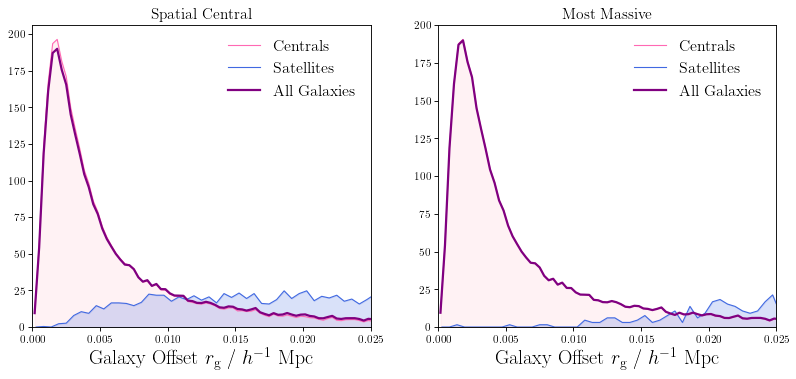

Min central offset : 0.036 h^-1 kpc
Max central offset : 121.871 h^-1 kpc
Mean central offset : 7.355 h^-1 kpc
Median central offset : 3.844 h^-1 kpc
Number of centrals with offset R > 45 h^-1 kpc : 1067/76177 (1.401 percent)


In [18]:
# Now let's look a bit more into the halo occupation
Hc, bc = np.histogram(sym['rh'][cmask], bins=90, range=(0,0.03), normed=1)
Hs, bs = np.histogram(sym['rh'][np.invert(cmask)], bins=90, range=(0,0.05), normed=1)
H0, b0 = np.histogram(sym['rh'], bins=90, range=(0,0.03), normed=1)

xc = (bc[:-1]+bc[1:])/2
xs = (bs[:-1]+bs[1:])/2
x0 = (b0[:-1]+b0[1:])/2

fig=plt.figure(figsize=(12, 5), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.subplot(121)
plt.title('Spatial Central', fontsize=14)
plt.fill_between(xc, Hc, alpha=0.2, color='pink')
plt.plot(xc, Hc, color='hotpink', label='Centrals')
plt.fill_between(xs, Hs, alpha=0.2, color='royalblue')
plt.plot(xs, Hs, color='royalblue', label='Satellites')
plt.plot(x0, H0, lw=2, color='purple', label='All Galaxies')
plt.xlabel('Galaxy Offset $r_\mathrm{g}$ / $h^{-1}$ Mpc', fontsize=18)
plt.legend()
plt.ylim(ymin=0)
plt.xlim(0,0.025)


# The same as above, but with the second 'centre' flag
cmask2 = (fid['most_massive']==1)
Hc, bc = np.histogram(sym['rh'][cmask2], bins=90, range=(0,0.03), normed=1)
Hs, bs = np.histogram(sym['rh'][np.invert(cmask2)], bins=90, range=(0,0.05), normed=1)
H0, b0 = np.histogram(sym['rh'], bins=90, range=(0,0.03), normed=1)

ax = plt.subplot(122)
plt.title('Most Massive', fontsize=14)
plt.fill_between(xc, Hc, alpha=0.2, color='pink')
plt.plot(xc, Hc, color='hotpink', label='Centrals')
plt.fill_between(xs, Hs, alpha=0.2, color='royalblue')
plt.plot(xs, Hs, color='royalblue', label='Satellites')
plt.plot(x0, H0, lw=2, color='purple', label='All Galaxies')
plt.xlabel('Galaxy Offset $r_\mathrm{g}$ / $h^{-1}$ Mpc', fontsize=18)
plt.legend()
plt.ylim(ymin=0)
plt.xlim(0,0.025)

plt.show()

print('Min central offset : %3.3f h^-1 kpc'%(sym['rh'][cmask].min()*1000))
print('Max central offset : %3.3f h^-1 kpc'%(sym['rh'][cmask].max()*1000))
print('Mean central offset : %3.3f h^-1 kpc'%(sym['rh'][cmask].mean()*1000))
print('Median central offset : %3.3f h^-1 kpc'%(np.median(sym['rh'][cmask])*1000))

select_extreme = (sym['rh'][cmask]>0.045)
print('Number of centrals with offset R > 45 h^-1 kpc : %d/%d (%3.3f percent)'%(fid['rh'][cmask][select_extreme].size, fid['rh'][cmask].size, fid['rh'][cmask][select_extreme].size*100./fid['rh'][cmask].size))

Catalogue contains 82747 discrete halos


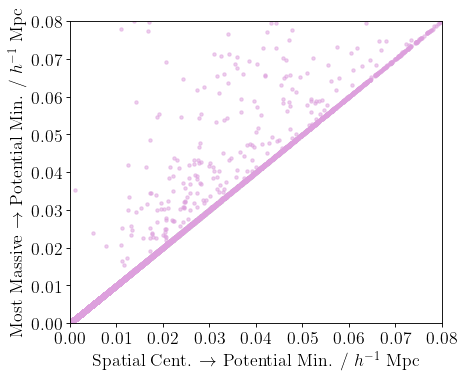

In [42]:
# Let's also plot the distance of the central galaxy from the potential minimum
# using the two different central flags
# This panel takes a little while to run - sorry

haloid = np.unique(sym['halo_id'])
cmask1 = (fid['spatial_central']==1)
cmask2 = (fid['most_massive']==1)

print('Catalogue contains %d discrete halos'%len(haloid))

def findoffset(cat):
    if (len(cat)==0):
        return -1.0
    elif (len(cat)!=1):
        print('WARNING: halo has more than one central')
        print(len(cat))
    dx = (cat['x']-cat['x0'])**2
    dy = (cat['y']-cat['y0'])**2
    dz = (cat['z']-cat['z0'])**2
    return np.sqrt(dx+dy+dz)

rmin = [findoffset(sym[cmask1 & (sym['halo_id']==i)]) for i in haloid]
rmin2 = [findoffset(sym[cmask2 & (sym['halo_id']==i)]) for i in haloid]

fig=plt.figure(figsize=(6, 5), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.subplot(111)
plt.scatter(rmin,rmin2, color='plum', alpha=0.5, cmap='PuOr', marker='.')
plt.xlim(0,0.08)
plt.ylim(0,0.08)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(r'Spatial Cent. $\rightarrow$ Potential Min. / $h^{-1}$ Mpc',fontsize=16)
plt.ylabel(r'Most Massive $\rightarrow$ Potential Min. / $h^{-1}$ Mpc',fontsize=16)
plt.show()

In [7]:
Ntot = fid.size
print('No. of single occupancy halos : %d/%d (%3.3f percent)'%(fid['x'][fid['nocc']==1].size, Ntot, 100.*fid['x'][fid['nocc']==1].size/Ntot))

No. of single occupancy halos : 73481/113560 (64.707 percent)


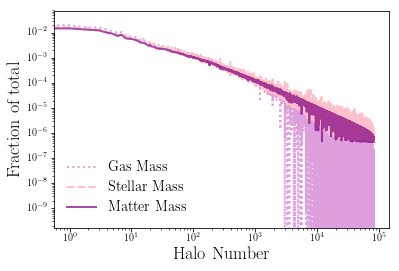

In [8]:

ids=np.unique(fid['halo_id'])
Mm = np.array([fid['matter_mass'][(fid['halo_id']==i)].sum() for i in ids])
Ms = np.array([fid['stellar_mass'][(fid['halo_id']==i)].sum() for i in ids])
Mg = np.array([fid['gas_mass'][(fid['halo_id']==i)].sum() for i in ids])
Ng = np.array([len(fid['gas_mass'][(fid['halo_id']==i)] ) for i in ids])
Ng=Ng.astype(float)

Mmtot = np.sum(Mm)
Mstot = np.sum(Ms)
Mgtot = np.sum(Mg)
Ngtot = np.sum(Ng)
                                    
plt.plot(Mg/Mgtot,  color='plum', lw=2, ls=':', label='Gas Mass')
plt.plot(Ms/Mstot, color='pink', lw=2, ls='--', label='Stellar Mass')
plt.plot(Mm/Mmtot, color='purple', lw=2, label='Matter Mass', alpha=0.7)
#plt.plot(Ng/Ngtot, color='hotpink', lw=2, ls='-.', label='No. of Galaxies')
plt.xscale('log')
plt.yscale('log')

plt.ylabel('Fraction of total', fontsize=18)
plt.xlabel('Halo Number', fontsize=18)
plt.legend()

In [9]:
snapshots = [68,73,79,85]
sig1 = []
sig2 = []
sig = []

for s in snapshots:
    print('Snapshot : %d'%s)
    dat = fi.FITS(base+'mbii-ndm1000-nst300-snapshot%d.fits'%s)[-1].read()
    e1,e2 = dat['e1_dm'],dat['e2_dm']
    e = np.sqrt(e1*e1 + e2*e2)
    sig1.append(np.std(e1))
    sig2.append(np.std(e2))
    sig.append(np.std(e))
    

sig1 = np.sqrt(np.array(sig1))
sig2 = np.sqrt(np.array(sig2))
sig = np.sqrt(np.array(sig))
print(sig1)
print(sig2)
print((sig1+sig2)/2)
print(sig)


Snapshot : 68
Snapshot : 73
Snapshot : 79
Snapshot : 85
[0.36390863 0.35328933 0.34261525 0.33156343]
[0.34441269 0.32939683 0.31754368 0.30852209]
[0.35416066 0.34134308 0.33007947 0.32004276]
[0.32261421 0.316863   0.30983937 0.30356994]
